<a href="https://colab.research.google.com/github/almazius/laba4_dataset/blob/main/AmazonBestsellers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Анализ книг-бестселлеров Амазона

## Data:  
- Unnamed: 0: the index of the books in the order they were scrapped
- Price: the price of each book
- Rank: the ranking of each book in the top 100 best-selling books for each year
- Title: the title of the book
- No of reviews: this is the total number of reviews a book has
- Rating: this is the user rating that a book has
- Author: this is the name of the author of a book
- Cover type: this is the cover type of each book
- Year: this is the year each book appeared as a best-selling book
- Genre: this is the category or type of book (Fiction or Non-Fiction)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_excel("Amazon_top100_bestselling_books_2009to2021.xlsx", index_col=0)
df = df.drop(["ranks"], axis = 1)
df.head(10)

,price,title,no_of_reviews,ratings,author,cover_type,year,genre
0,12.49,The Lost Symbol,16118.0,4.4,Dan Brown,Hardcover,2009,Fiction
1,13.40,The Shack: Where Tragedy Confronts Eternity,23392.0,4.7,William P. Young,Paperback,2009,Fiction
2,9.93,Liberty and Tyranny: A Conservative Manifesto,5036.0,4.8,Mark R. Levin,Hardcover,2009,Non Fiction
3,14.30,"Breaking Dawn (The Twilight Saga, Book 4)",16912.0,4.7,Stephenie Meyer,Hardcover,2009,Fiction
4,9.99,Going Rogue: An American Life,1572.0,4.6,Sarah Palin,Hardcover,2009,Non Fiction
5,18.29,StrengthsFinder 2.0,7082.0,4.1,Gallup,Hardcover,2009,Non Fiction
6,12.66,The Help,18068.0,4.8,Kathryn Stockett,Hardcover,2009,Fiction
7,17.56,New Moon (The Twilight Saga),12329.0,4.7,Stephenie Meyer,Paperback,2009,Fiction
8,58.90,The Twilight Saga Collection,6100.0,4.7,Stephenie Meyer,Hardcover,2009,Fiction
9,16.04,Outliers: The Story of Success,22209.0,4.7,Malcolm Gladwell,Hardcover,2009,Non Fiction


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1291 entries, 0 to 1290
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          1287 non-null   float64
 1   title          1286 non-null   object 
 2   no_of_reviews  1287 non-null   float64
 3   ratings        1287 non-null   float64
 4   author         1286 non-null   object 
 5   cover_type     1286 non-null   object 
 6   year           1291 non-null   int64  
 7   genre          1288 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 90.8+ KB


In [ ]:
df.shape

(1291, 8)

In [ ]:
df[df['title'].isna()]

,price,title,no_of_reviews,ratings,author,cover_type,year,genre
390,NaN,NaN,NaN,NaN,NaN,NaN,2012,unknown
735,NaN,NaN,NaN,NaN,NaN,NaN,2016,NaN
787,NaN,NaN,NaN,NaN,NaN,NaN,2016,Fiction
868,9.45,NaN,833.0,4.6,NaN,NaN,2017,unknown
1087,NaN,NaN,NaN,NaN,NaN,NaN,2019,NaN


In [ ]:
df = df.dropna(subset=['title'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1286 entries, 0 to 1290
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          1286 non-null   float64
 1   title          1286 non-null   object 
 2   no_of_reviews  1286 non-null   float64
 3   ratings        1286 non-null   float64
 4   author         1286 non-null   object 
 5   cover_type     1286 non-null   object 
 6   year           1286 non-null   int64  
 7   genre          1285 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 90.4+ KB


In [ ]:
df[df['genre'].isna()]

,price,title,no_of_reviews,ratings,author,cover_type,year,genre
1258,9.42,The Screaming Goat (Book & Figure),30143.0,4.7,Running Press,Paperback,2021,NaN


In [ ]:
df = df.dropna(subset=['genre'])
df['no_of_reviews'] = df['no_of_reviews'].astype('int')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1285 entries, 0 to 1290
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          1285 non-null   float64
 1   title          1285 non-null   object 
 2   no_of_reviews  1285 non-null   int64  
 3   ratings        1285 non-null   float64
 4   author         1285 non-null   object 
 5   cover_type     1285 non-null   object 
 6   year           1285 non-null   int64  
 7   genre          1285 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 90.4+ KB


## Гипотеза:  
С каждым годом количество книг в жанре "Фантастика" увеличивается

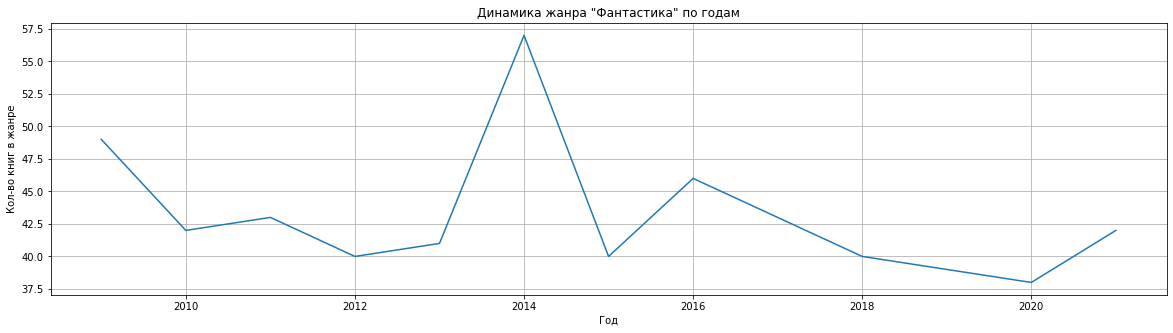

In [ ]:
plt.figure(figsize=(20, 5))
plt.title('Динамика жанра "Фантастика" по годам')
plt.xlabel('Год')
plt.ylabel('Кол-во книг в жанре')
plt.grid(True)
sns.lineplot(data=df.loc[df['genre']=='Fiction'].groupby('year')['genre'].count())
plt.show()

Пик жанра был достигнут в 2014 году, ежегодного роста не наблюдается.  
**Отвергаем нулевую гипотезу.**

## Зависимости


In [ ]:
df.corr()

,price,no_of_reviews,ratings,year
price,1.000000,-0.121694,-0.109528,-0.223079
no_of_reviews,-0.121694,1.000000,0.173148,0.426113
ratings,-0.109528,0.173148,1.000000,0.292291
year,-0.223079,0.426113,0.292291,1.000000


Видим, что наибольший коэффицент корреляции по всему датасету имеет связка года выпуска и количества ревью.  
Рассмотрим её подробнее.

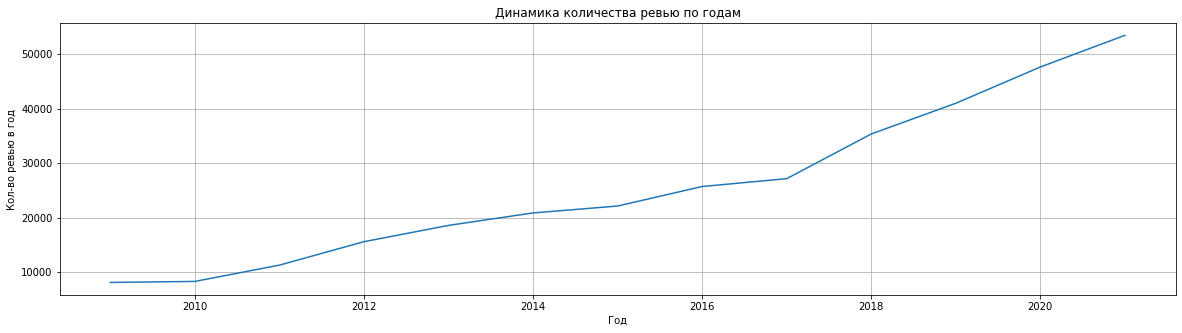

In [ ]:
plt.figure(figsize=(20, 5))
plt.title('Динамика количества ревью по годам')
plt.xlabel('Год')
plt.ylabel('Кол-во ревью в год')
plt.grid(True)
sns.lineplot(data=df.groupby('year')['no_of_reviews'].mean())
plt.show()

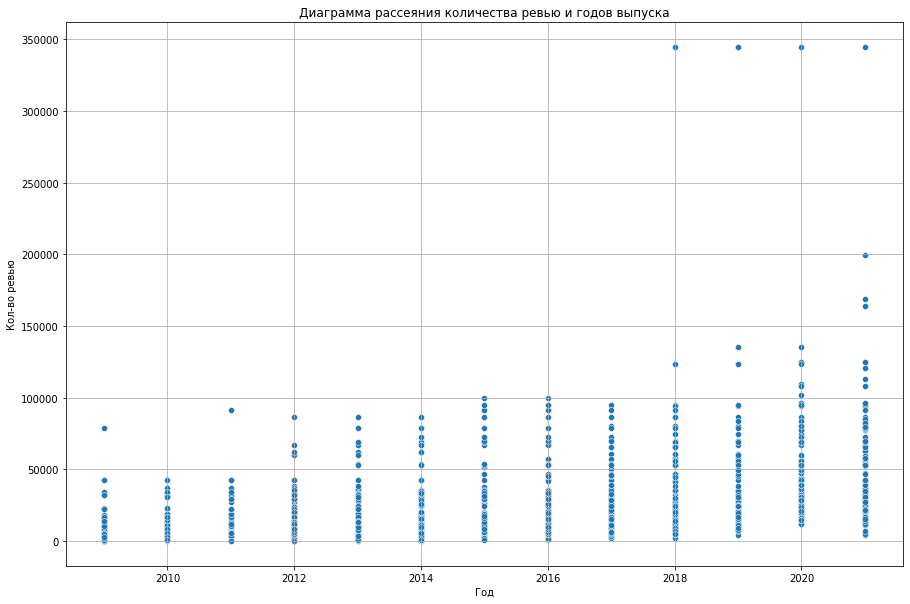

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Диаграмма рассеяния количества ревью и годов выпуска')
plt.xlabel('Год')
plt.ylabel('Кол-во ревью')
plt.grid(True)
sns.scatterplot(data=df, y=df['no_of_reviews'], x=df['year'])
plt.show()

Сложно сказать о наличии строгой линейной зависимости, однако по графикам чётко прослеживается рост количества ревью c течением времени.